In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are 891 passengers in the dataset
- Age field has several null values that need to be rectified
- Cabin has majority of the values as null, therefore we should drop the column
- Embarked has 2 null values, should be negligible 


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We are going with the assumption that some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Visualizing the data

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

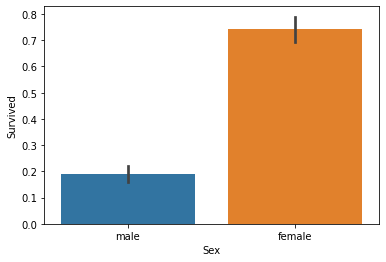

In [5]:
sns.barplot(x="Sex", y="Survived", data=data)

As we can see around 70% of the survivers were female

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

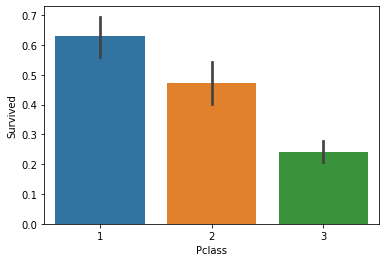

In [6]:
sns.barplot(x="Pclass", y="Survived", data=data)

It is clearly seen that the upper class people had a greater chance of surviving as compared to the lower class

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

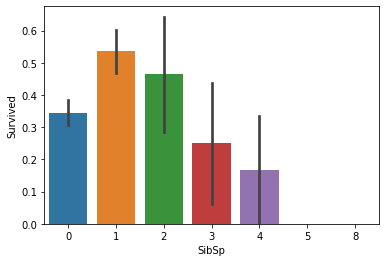

In [7]:
sns.barplot(x="SibSp", y="Survived", data=data)

There seems to be a downward trend for survivers as the number of siblings or spouses increases from 1 to more, with the exception that people with no siblings or spouses were less likely to survive than people with 1 or 2 siblings or spouses

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

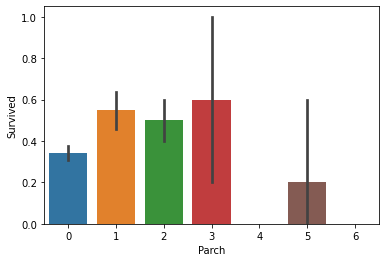

In [8]:
sns.barplot(x="Parch", y="Survived", data=data)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

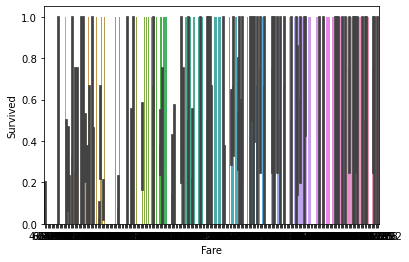

In [9]:
sns.barplot(x="Fare", y="Survived", data=data)

The ones with less than four parents or children aboard are more likely to survive than those with four or more, whereas people traveling without any parents or children are less likely to survive than those with 1-3 parents or children.

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

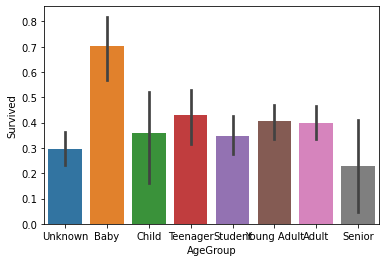

In [10]:
data["Age"] = data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data["Age"], bins, labels = labels)


sns.barplot(x="AgeGroup", y="Survived", data=data)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

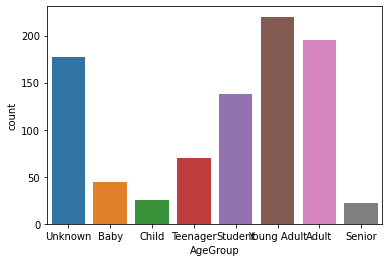

In [11]:
data["Age"] = data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data["Age"], bins, labels = labels)


sns.countplot(x="AgeGroup", data=data)

From the above plot, we can clearly see that babies were the age group most likely to survive

<AxesSubplot:xlabel='Embarked', ylabel='count'>

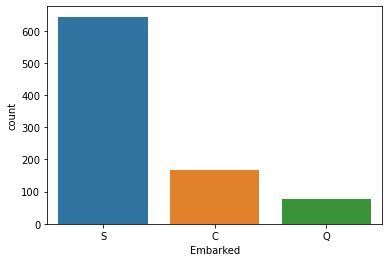

In [12]:
sns.countplot(x='Embarked',data=data)

Majority of the passengers embarked from Southampton, therefore we can fill the missing values as also embarked from Southampton

## Cleaning the data

In [13]:
data.drop('Cabin',axis=1,inplace=True)
#since cabin has majority of its values as null

In [14]:
data.drop('Ticket',axis=1,inplace=True)
#since ticket is unlikely to result in any useful insights

In [15]:
data = data.drop(['Name'], axis = 1)
#Name is also unlikely to result in any useful insights

In [16]:
data["Age"] = data["Age"].fillna(value=int(np.random.normal(30,5,1)))
data
# Since most of the passengers seem to be around the young adult-adult age group, the missing values are being filled with values around that age

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,7.2500,S,Student
1,2,1,1,female,38.0,1,0,71.2833,C,Adult
2,3,1,3,female,26.0,0,0,7.9250,S,Young Adult
3,4,1,1,female,35.0,1,0,53.1000,S,Young Adult
4,5,0,3,male,35.0,0,0,8.0500,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Young Adult
887,888,1,1,female,19.0,0,0,30.0000,S,Student
888,889,0,3,female,-0.5,1,2,23.4500,S,Unknown
889,890,1,1,male,26.0,0,0,30.0000,C,Young Adult


In [17]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,7.2500,S,Student
1,2,1,1,female,38.0,1,0,71.2833,C,Adult
2,3,1,3,female,26.0,0,0,7.9250,S,Young Adult
3,4,1,1,female,35.0,1,0,53.1000,S,Young Adult
4,5,0,3,male,35.0,0,0,8.0500,S,Young Adult


In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.699966,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.731181,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,-0.500000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
data['Embarked'].fillna('S',inplace=True)

<AxesSubplot:>

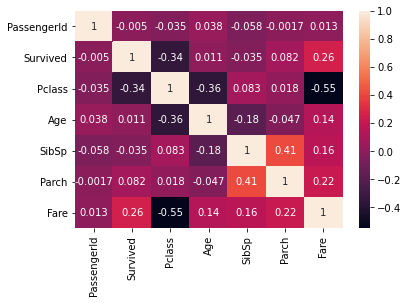

In [20]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

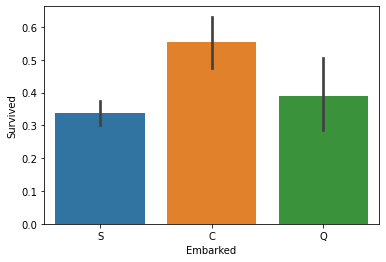

In [21]:
sns.barplot(x="Embarked", y="Survived", data=data)

In [22]:
datadummies=pd.get_dummies(data,drop_first=True)
datadummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,1,0,0


In [23]:
X=datadummies[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']]
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,-0.5,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [24]:
y=datadummies['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Data Models

In [25]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=0)

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)
acclr = round(accuracy_score(ypred, ytest) * 100, 2)
cmlr=confusion_matrix(ytest,ypred)
print('accuracy score is ',acclr)
print('confusion matrix is ',cmlr)
print(metrics.classification_report(ytest,ypred))

accuracy score is  80.72
confusion matrix is  [[116  23]
 [ 20  64]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       139
           1       0.74      0.76      0.75        84

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [27]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

dtr = DecisionTreeClassifier()
dtr.fit(Xtrain, ytrain)
ypred = dtr.predict(Xtest)
accdtr = round(accuracy_score(ypred, ytest) * 100, 2)
cmdtr=confusion_matrix(ytest,ypred)
print('accuracy score is ',accdtr)
print('confusion matrix is ',cmdtr)
print(metrics.classification_report(ytest,ypred))

accuracy score is  79.82
confusion matrix is  [[117  22]
 [ 23  61]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       139
           1       0.73      0.73      0.73        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
accrf = round(accuracy_score(ypred, ytest) * 100, 2)
cmrf=confusion_matrix(ytest,ypred)
print('accuracy score is ',accrf)
print('confusion matrix is ',cmrf)
print(metrics.classification_report(ytest,ypred))

accuracy score is  82.51
confusion matrix is  [[124  15]
 [ 24  60]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       139
           1       0.80      0.71      0.75        84

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



In [29]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

cls = GaussianNB()
cls.fit(Xtrain, ytrain)
ypred = cls.predict(Xtest)
accgauss = round(accuracy_score(ypred, ytest) * 100, 2)
cmgauss=confusion_matrix(ytest,ypred)
print('accuracy score is ',accgauss)
print('confusion matrix is ',cmgauss)

accuracy score is  78.03
confusion matrix is  [[111  28]
 [ 21  63]]


In [30]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
accknn = round(accuracy_score(ypred, ytest) * 100, 2)
cmknn=confusion_matrix(ytest,ypred)
print('accuracy score is ',accknn)
print('confusion matrix is ',cmknn)

accuracy score is  69.06
confusion matrix is  [[108  31]
 [ 38  46]]


In [31]:
models = pd.DataFrame({
'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [ accknn, acclr, 
              accrf, accgauss, accdtr,
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,82.51
1,Logistic Regression,80.72
4,Decision Tree,79.82
3,Naive Bayes,78.03
0,KNN,69.06


Since Random Forest classifier has the highest accuracy score, we can use that to make our predictions

In [32]:
ypred1=clf.predict([[3,21,0,2,25,1,0,0]])
ypred1

array([1])

In [33]:
ypred2=clf.predict([[1,74,1,2,7.25,0,1,0]])
ypred2

array([1])

In [34]:
ypred3=clf.predict([[2,32,2,2,40,1,1,0]])
ypred3

array([0])

In [35]:
ypred4=clf.predict([[1,41,3,0,32,1,0,0]])
ypred4

array([1])

In [36]:
ypred5=clf.predict([[1,41,3,0,32,1,0,0]])
ypred5

array([1])